In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from skimage import color
from keras.callbacks import EarlyStopping

import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 

In [ ]:
import csv
import math as m
l1 = 50
l2 = 40
with open('Robot2b.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','Px','Py'])

  for tt1 in range(-150,151,1):
    for tt2 in range(-150,151,1):
      Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)
      Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)
      writer.writerow([tt1,tt2,Px,Py])

In [ ]:
data=pd.read_csv('Robot2b.csv')
data

,tt1,tt2,Px,Py
0,-180,-180,-41.270647,1.701003
1,-180,-179,-3.778171,9.784744
2,-180,-178,9.676867,45.701238
3,-180,-177,-13.276034,76.429027
4,-180,-176,-51.534081,73.717123
...,...,...,...,...
130316,180,176,-51.534081,-73.717123
130317,180,177,-13.276034,-76.429027
130318,180,178,9.676867,-45.701238
130319,180,179,-3.778171,-9.784744


In [ ]:
x=data.drop(data.columns[:2],axis=1)

In [ ]:
y=data.drop(data.columns[2:],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dense_1 (Dense)             (None, 500)               256500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 2)                 202       
                                                                 
Total params: 438,638
Trainable params: 438,638
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size = 128,epochs=50,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

764/764 [==============================] - 11s 15ms/step - loss: -30304734.0000 - accuracy: 0.5003 - val_loss: 137261.9062 - val_accuracy: 0.4965
Epoch 16/50
764/764 [==============================] - 11s 15ms/step - loss: -6578906.0000 - accuracy: 0.4973 - val_loss: 3964520.7500 - val_accuracy: 0.4965
Epoch 17/50
764/764 [==============================] - 11s 15ms/step - loss: 17420164.0000 - accuracy: 0.4984 - val_loss: 26293708.0000 - val_accuracy: 0.4965
Epoch 18/50
764/764 [==============================] - 11s 14ms/step - loss: -10991131.0000 - accuracy: 0.5020 - val_loss: 11674416.0000 - val_accuracy: 0.4965
Epoch 19/50
764/764 [==============================] - 11s 15ms/step - loss: -496929.1250 - accuracy: 0.4975 - val_loss: 17448484.0000 - val_accuracy: 0.4965
Epoch 20/50
764/764 [==============================] - 11s 15ms/step - loss: 11483693.0000 - accuracy: 0.4976 - val_loss: 2988423.5000 - val_accuracy: 0.5035
Epoch 21/50
764/764 [==============================] - 11s 14

In [ ]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac kiem tra la:', score[1])

Sai so kiem tra la: 40591396.0
Do chinh xac kiem tra la: 0.49654707312583923


In [ ]:
model.save('Robot2b.h5')
from tensorflow.keras.models import load_model
model = load_model('Robot2b.h5')

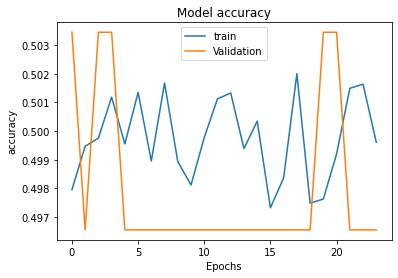

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','Validation'])
plt.show()